In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [4]:
df.shape

(5880, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5880,5880,5880.000000,5880,5880,5880.000000,5880,5880,5880,5880,...,5880,5880,5880,5880,5880,5880,5880,5880.000000,5880.000000,5880
unique,5880,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,CUST0000,Male,NaN,Yes,No,NaN,Yes,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card,NaN,NaN,No
freq,1,2950,NaN,2995,3004,NaN,2941,2939,2029,2029,...,2029,2029,2029,2029,2020,2990,1503,NaN,NaN,2982
mean,NaN,NaN,0.500680,NaN,NaN,36.549150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.157779,2566.813165,NaN
std,NaN,NaN,0.500042,NaN,NaN,20.909674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.804615,1910.017743,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.030000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.717500,1020.217500,NaN
50%,NaN,NaN,1.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.155000,2136.445000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.457500,3767.665000,NaN


In [10]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [12]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [14]:
# Check churn balance
print(df['Churn'].value_counts(normalize=True))

No     0.507143
Yes    0.492857
Name: Churn, dtype: float64


In [15]:
df['Churn'].value_counts()

No     2982
Yes    2898
Name: Churn, dtype: int64

In [16]:
# Numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


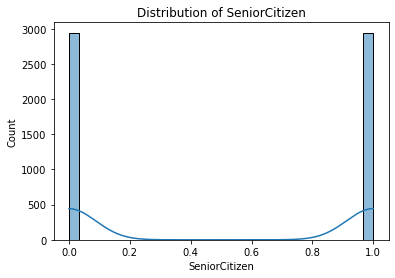

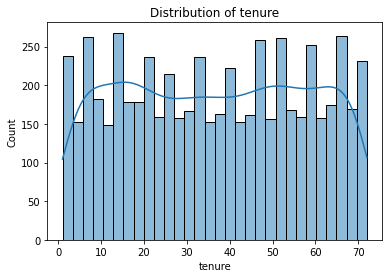

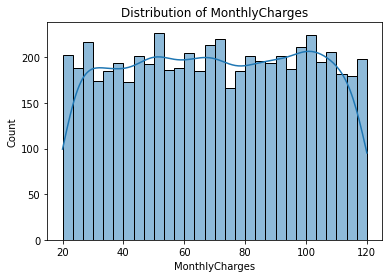

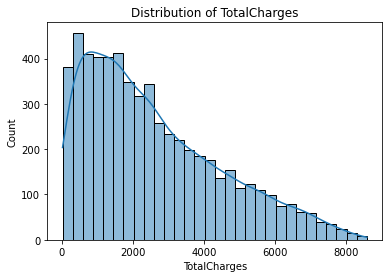

In [17]:
# Summary statistics
print(df[num_cols].describe())

# Distribution plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


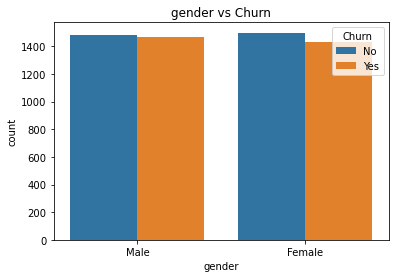

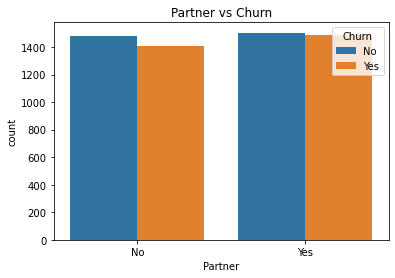

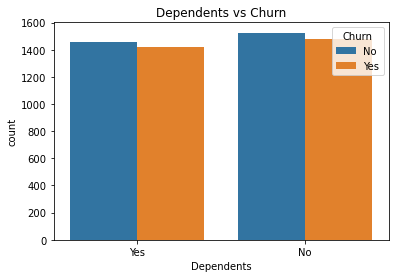

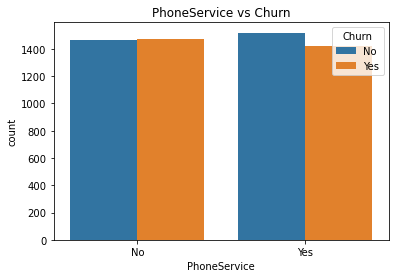

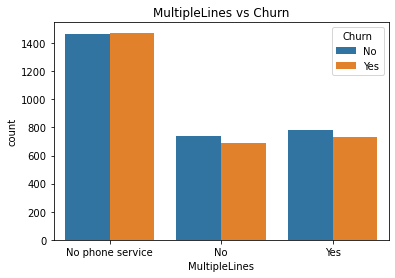

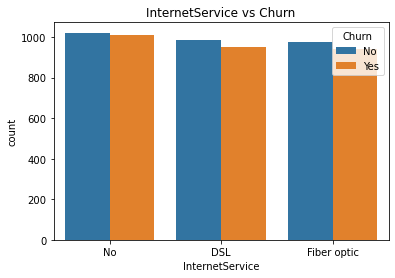

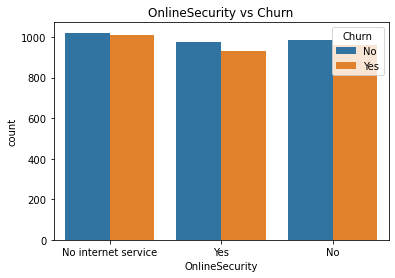

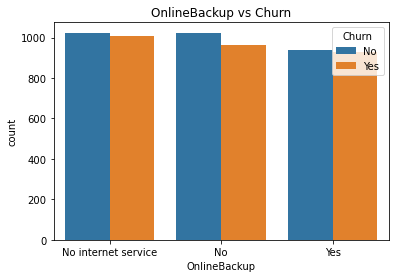

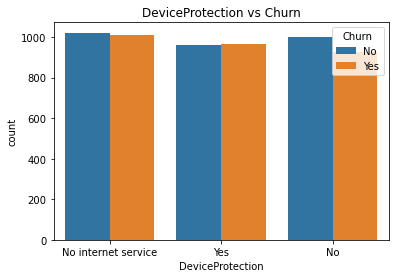

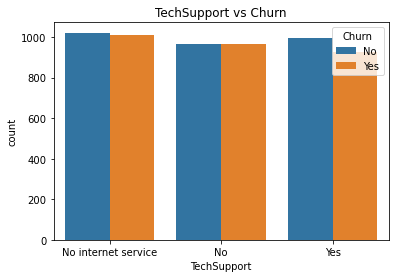

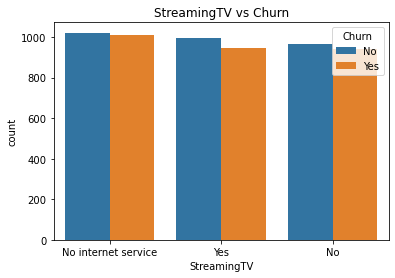

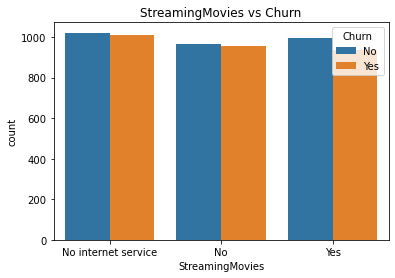

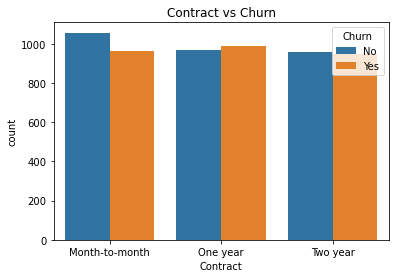

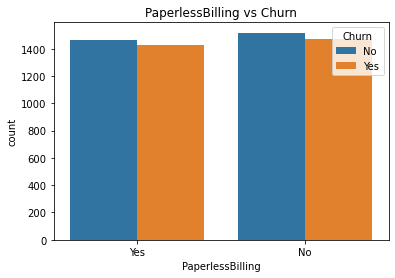

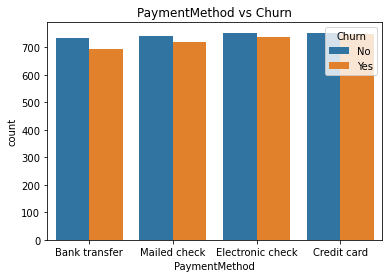

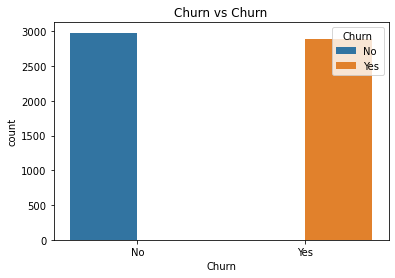

In [18]:
# Summary statistics
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.show()


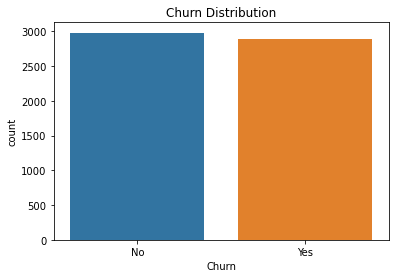

In [19]:
# Plot churn distribution
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [20]:
# ---- Categorical Features vs Churn ----
cat_cols = ['gender','SeniorCitizen','Partner','Dependents',
            'PhoneService','InternetService','Contract']


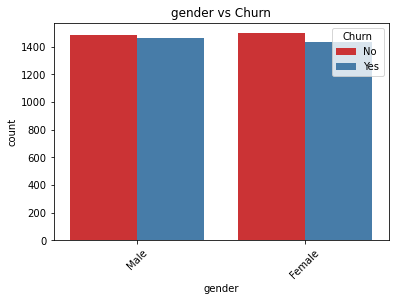

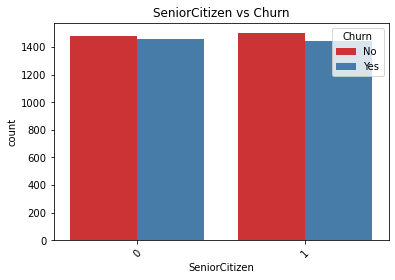

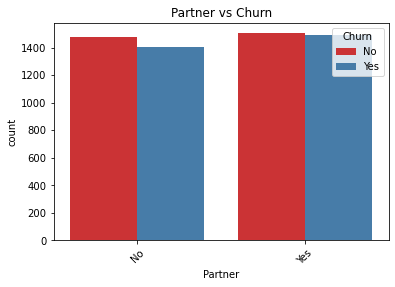

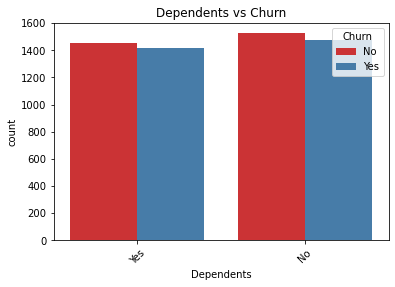

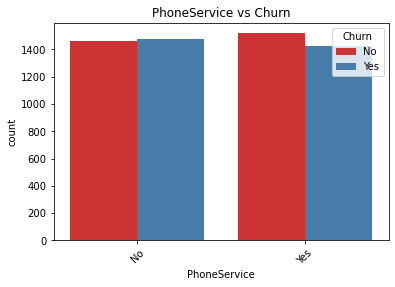

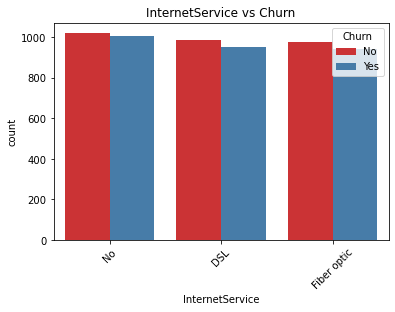

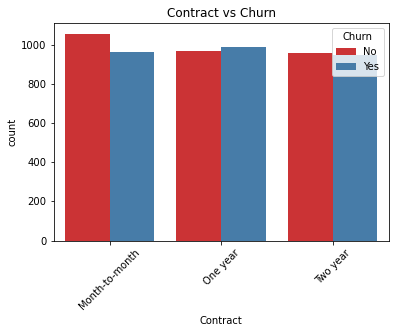

In [21]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set1")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


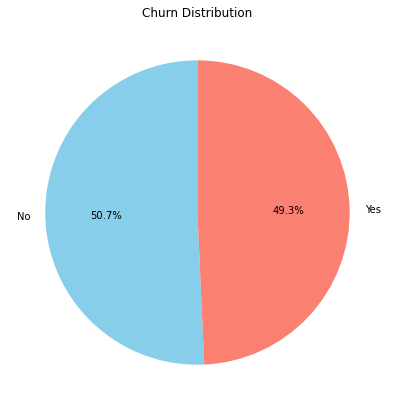

In [22]:
plt.figure(figsize=(10,7))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.title("Churn Distribution")
plt.ylabel("")  # remove y-label
plt.show()

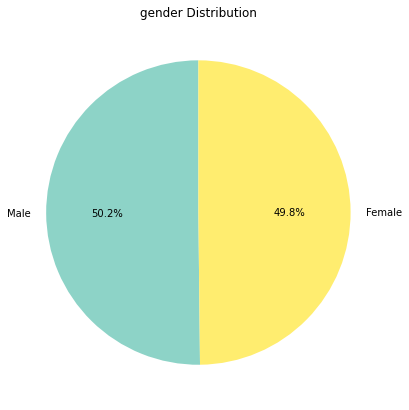

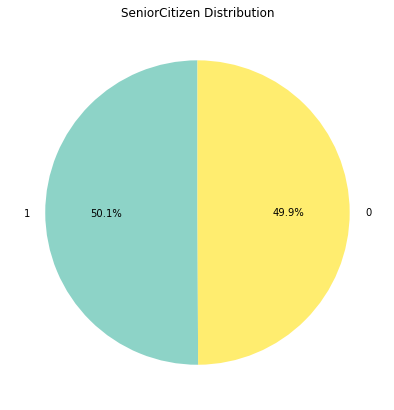

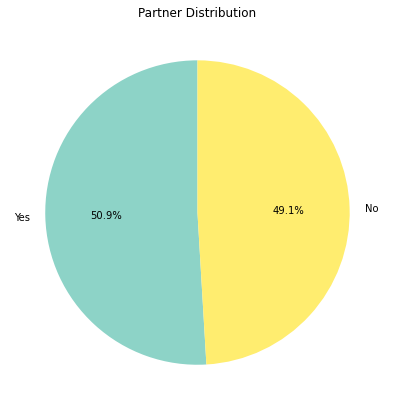

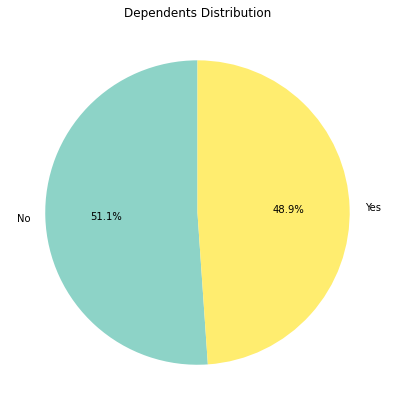

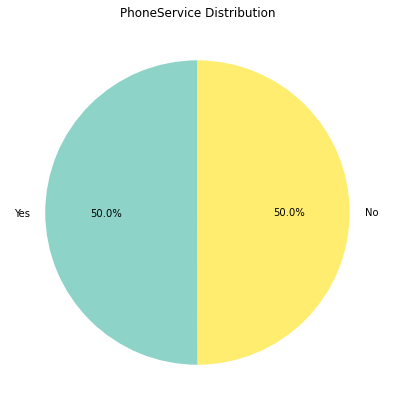

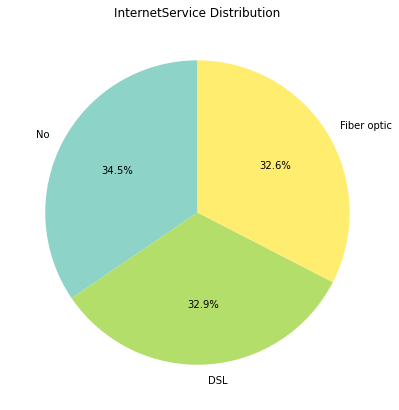

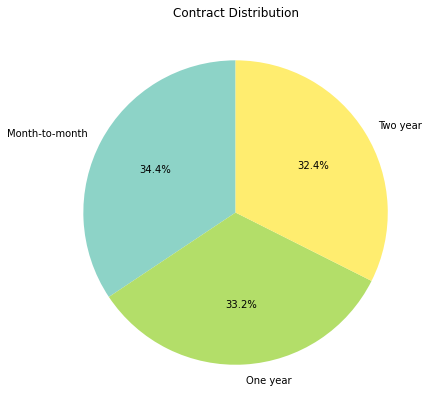

In [23]:
for col in cat_cols:
    plt.figure(figsize=(10,7))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f"{col} Distribution")
    plt.ylabel("")
    plt.show()

In [24]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.006154,0.014181,0.009297
tenure,0.006154,1.000000,0.004328,0.770371
MonthlyCharges,0.014181,0.004328,1.000000,0.556698
TotalCharges,0.009297,0.770371,0.556698,1.000000


<AxesSubplot:>

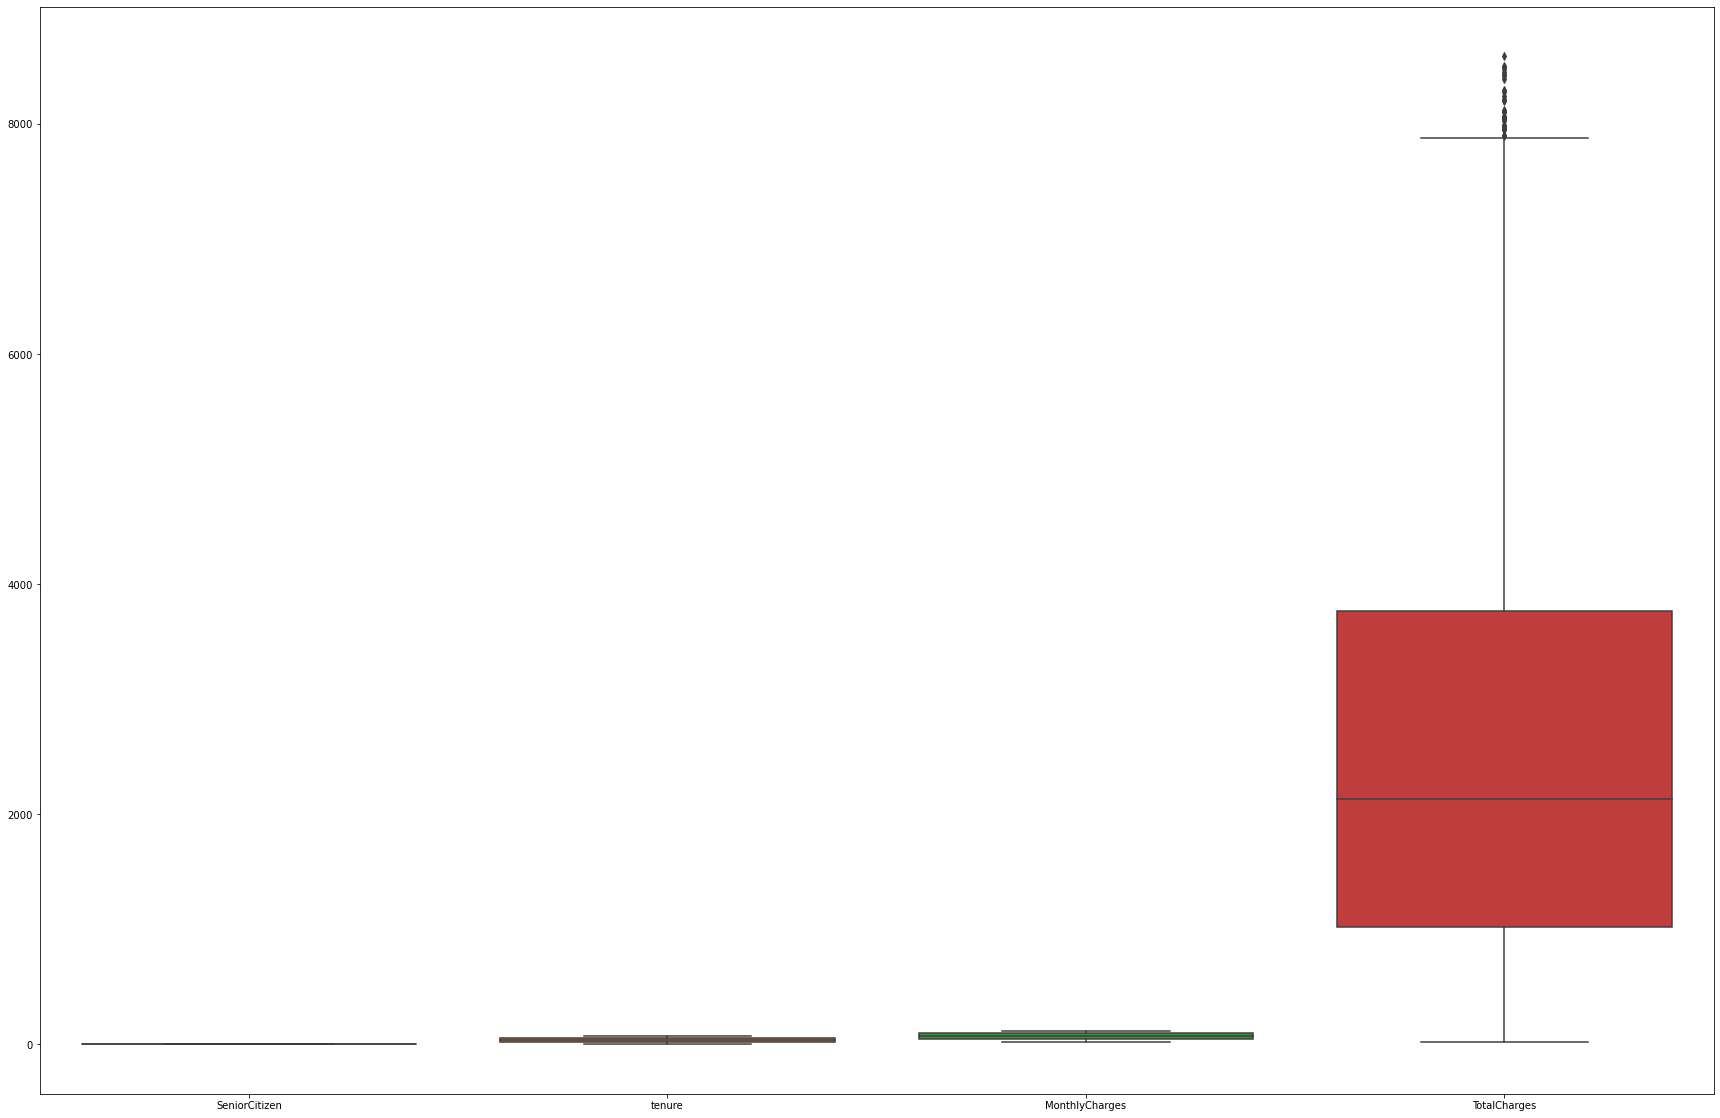

In [25]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)

<AxesSubplot:>

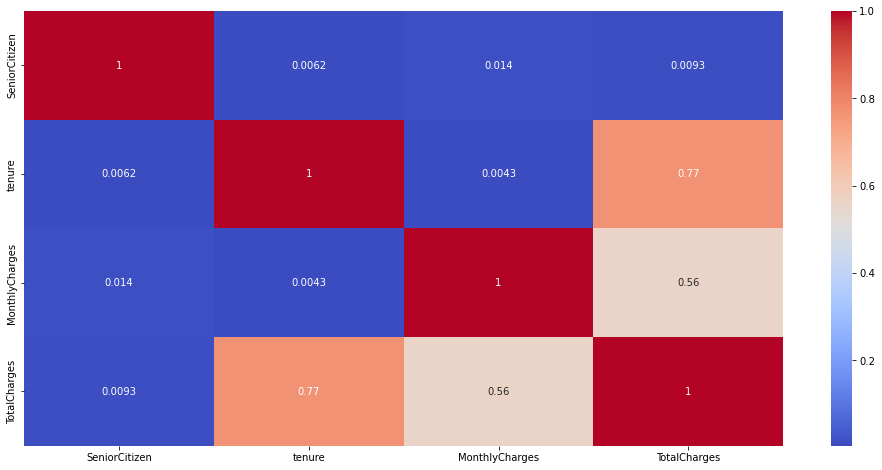

In [26]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [27]:
# Separate features & target
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes':1, 'No':0})  # Encode target


In [28]:
# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)


In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [32]:
# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]


In [33]:
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

In [34]:

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Classification Report
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


ROC-AUC Score: 0.47479460772969223

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.51      0.60      0.55       596
           1       0.49      0.40      0.44       580

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.50      1176

Training Accuracy: 0.53125
Testing Accuracy: 0.5008503401360545


In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.title("Confusion Matrix")
plt.show()

NameError: name 'y_pred' is not defined

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.4933673469387755


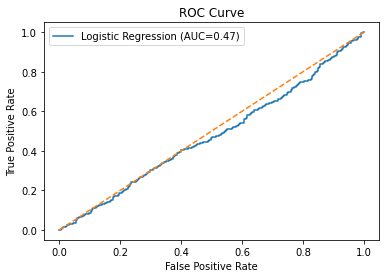

In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC=%.2f)" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
import pickle

# Save logistic regression model
pickle.dump(log_reg, open("logistic_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save training columns (important for aligning user input)
pickle.dump(X.columns, open("columns.pkl", "wb"))
